In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Import Data

In [2]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')
# import bus trips
bus_trips = pd.read_csv("../DataOut/bus_trips.csv")

# load the csv Data Sets\route points.csv 
route_points = pd.read_csv("../Data Sets/route points.csv")

# import csv DataOut\fullDataset_with_Newfeatures.csv
fullDataset_with_Newfeatures = pd.read_csv("../DataOut/fullDataset_with_Newfeatures.csv")

In [3]:
# show all the columns of the data
pd.set_option('display.max_columns', None)

In [4]:
fullDataset_with_Newfeatures

trip_id  deviceid  direction  segment  run_time_in_seconds  length  \
0       4890.0     262.0        1.0      1.0                 69.0  0.6261   
1       4890.0     262.0        1.0      2.0                210.0  1.2808   
2       4890.0     262.0        1.0      3.0                496.0  2.1125   
3       4890.0     262.0        1.0      4.0                195.0  1.5513   
4       4890.0     262.0        1.0      5.0                 97.0  0.8450   
...        ...       ...        ...      ...                  ...     ...   
40742   3461.0     123.0        1.0     11.0                183.0  1.1000   
40743   3461.0     123.0        1.0     12.0                173.0  1.3100   
40744   3461.0     123.0        1.0     13.0                142.0  1.1500   
40745   3461.0     123.0        1.0     14.0                121.0  0.8900   
40746   3461.0     123.0        1.0     15.0                345.0  1.9700   

       day_of_week  time_of_day  Sunday/holiday  saturday  weekday/end  \
0              4.0         6.50             0.0         0            1   
1              4.0         6.50             0.0         0            1   
2              4.0         6.75             0.0         0            1   
3              4.0         6.75             0.0         0            1   
4              4.0         6.75             0.0         0            1   
...            ...          ...             ...       ...          ...   
40742          0.0        17.50             0.0         0            1   
40743          0.0        17.50             0.0         0            1   
40744          0.0        17.75             0.0         0            1   
40745          0.0        17.75             0.0         0            1   
40746          0.0        17.75             0.0         0            1   

       week_no  rt(w-1)  rt(w-2)  rt(w-3)  rt(t-1)  rt(t-2)  rt(n-1)  rt(n-2)  \
0          1.0     96.0     96.0     96.0     96.0     96.0     96.0     96.0   
1          1.0    247.0    247.0    247.0    247.0    247.0     69.0    247.0   
2          1.0    506.0    506.0    506.0    506.0    506.0    210.0     69.0   
3          1.0    192.0    192.0    192.0    192.0    192.0    496.0    210.0   
4          1.0    114.0    114.0    114.0    114.0    114.0    195.0    496.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40742     42.0    172.0    166.0    156.0    242.0    116.0    194.0     39.0   
40743     42.0    183.0    170.0    172.0    142.0    150.0    183.0    194.0   
40744     42.0    149.0    149.0    161.0    149.0    134.0    173.0    183.0   
40745     42.0    119.0    119.0    151.0    335.0    119.0    142.0    173.0   
40746     42.0    366.0    366.0    364.0    382.0    366.0    121.0    142.0   

       rt(n-3)  hour_of_day  day  month  temp  precip  windspeed  dt(n-1)  \
0         96.0          6.0    1     10  20.0   0.000        6.1      0.0   
1        247.0          6.0    1     10  20.0   0.000        6.1     74.0   
2        506.0          6.0    1     10  20.0   0.000        6.1      0.0   
3         69.0          6.0    1     10  20.0   0.000        6.1      6.0   
4        210.0          6.0    1     10  20.0   0.000        6.1      0.0   
...        ...          ...  ...    ...   ...     ...        ...      ...   
40742     94.0         17.0   31     10  25.3   0.269        0.1      0.0   
40743     39.0         17.0   31     10  25.3   0.269        0.1     10.0   
40744    194.0         17.0   31     10  25.3   0.269        0.1      2.0   
40745    183.0         17.0   31     10  25.3   0.269        0.1     17.0   
40746    173.0         17.0   31     10  25.3   0.269        0.1     24.0   

       year  start_float  conditions_encoded dayparts      speed  \
0      2021     6.663611                 4.0  morning  14.938800   
1      2021     6.703333                 4.0  morning   8.099356   
2      2021     6.761667                 4.0  morning   7.752244   
3      2021     6.90111

In [5]:
# number of unique trip_ids
len(fullDataset_with_Newfeatures.trip_id.unique())

2736

## prepare data

In [6]:
datain_one_direction=data[(data['direction']==1) & (data['date']<='2022-10-01')]
data_to_cluster=datain_one_direction[['trip_id','deviceid','speed','acceleration','radial_acceleration','acceleration_der']]
# reset index
data_to_cluster=data_to_cluster.reset_index(drop=True)

In [53]:
# number of unique trip_ids
len(data_to_cluster.trip_id.unique())

2535

In [8]:
# set Nan in bus_stop to 0
data['bus_stop']=data['bus_stop'].fillna(0)
datain_one_direction['bus_stop']=datain_one_direction['bus_stop'].fillna(0)

C:\Users\gw\AppData\Local\Temp\ipykernel_26220\65654468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datain_one_direction['bus_stop']=datain_one_direction['bus_stop'].fillna(0)


In [9]:
Cols_for_clusteringDF=['devicetime', 'radial_acceleration','speed', 'acceleration','distance_from_start','acceleration_der','bus_stop']

In [10]:
from sklearn.preprocessing import StandardScaler

# Create empty lists to store trip IDs and dataframes
processed_trip_ids = []
dataframes_without_trip_id = []

# Iterate through each unique trip_id
for trip_id in datain_one_direction['trip_id'].unique():
    # Filter the data for the current trip_id
    trip_data = datain_one_direction[datain_one_direction['trip_id'] == trip_id].copy()
    
    # Remove the trip_id column from the current trip_data
    trip_data_without_id = trip_data[Cols_for_clusteringDF]
    
    # Ensure selected columns are numeric (e.g., exclude any object or string columns)
    numeric_columns = [ 'radial_acceleration','speed', 'acceleration','distance_from_start','acceleration_der']
    trip_data_without_id [numeric_columns]= trip_data_without_id[numeric_columns].astype(float)  # Convert to float data type
    

    # Append the trip_id to the list
    processed_trip_ids.append(trip_id)
    
    # Append the dataframe without trip_id to the list
    dataframes_without_trip_id.append(trip_data_without_id)

# Print the processed trip IDs and the first few rows of each dataframe
for trip_id, df in zip(processed_trip_ids, dataframes_without_trip_id):
    print(f"Processed Trip ID: {trip_id}")
    print(df.head())  # Print the first few rows of the dataframe
    print("\n")

C:\Users\gw\AppData\Local\Temp\ipykernel_26220\2809339356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data_without_id [numeric_columns]= trip_data_without_id[numeric_columns].astype(float)  # Convert to float data type
C:\Users\gw\AppData\Local\Temp\ipykernel_26220\2809339356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data_without_id [numeric_columns]= trip_data_without_id[numeric_columns].astype(float)  # Convert to float data type
C:\Users\gw\AppData\Local\Temp\ipykernel_26220

Processed Trip ID: 2.0
            devicetime  radial_acceleration     speed  acceleration  \
0  2021-10-16 08:03:19             0.000000  14.03890      0.323975   
1  2021-10-16 08:03:34             1.278067  10.25920     -0.251980   
2  2021-10-16 08:03:49             0.722300   7.55940     -0.179987   
3  2021-10-16 08:04:04             0.048332   3.77970     -0.251980   
4  2021-10-16 08:04:19             1.052222   9.17927      0.359971   

   distance_from_start  acceleration_der bus_stop  
0             0.000000          0.000000        0  
1           123.738485         -0.038397        0  
2           163.044397          0.004800        0  
3           211.472339         -0.004800        0  
4           287.492821          0.040797      101  


Processed Trip ID: 4.0
              devicetime  radial_acceleration    speed  acceleration  \
206  2021-10-16 12:21:00             0.000000  0.00000     -0.395969   
207  2021-10-16 12:21:15             0.058599  7.01944      0.467963 

In [11]:
total_dis=0

for index, df in enumerate(dataframes_without_trip_id):
    current_max = df['distance_from_start'].max()
    total_dis+=current_max
    # print(f"Trip ID: {processed_trip_ids[index]} has a distance of {current_max} meters.total distance : {total_dis}.\n")
    
avg_dis=total_dis/len(dataframes_without_trip_id)

print("average distance : ", avg_dis)

average distance :  7598.001494917527


In [12]:
new_dataframes = []
new_processed_trip_ids = []

for index, df in enumerate(dataframes_without_trip_id):
    distance_of_the_trip = df['distance_from_start'].max()
    if distance_of_the_trip <= (avg_dis + 300):
        # Keep this DataFrame
        new_dataframes.append(df)
        new_processed_trip_ids.append(processed_trip_ids[index])

# Replace the original lists with the filtered lists
dataframes_without_trip_id = new_dataframes
processed_trip_ids = new_processed_trip_ids

In [13]:
# data_to_cluster only keep the raws that have trip ids in processed_trip_ids
data_to_cluster=data_to_cluster[data_to_cluster['trip_id'].isin(processed_trip_ids)]

In [14]:
# delete rows with duplicate distance_from_start values in each data frames in dataframes_without_trip_id list
for df in dataframes_without_trip_id:
    df.drop_duplicates(subset=['distance_from_start'], keep='first', inplace=True)

C:\Users\gw\AppData\Local\Temp\ipykernel_26220\2356658688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['distance_from_start'], keep='first', inplace=True)


In [15]:
for df in dataframes_without_trip_id:
    df['devicetime'] = pd.to_datetime(df['devicetime'])  # Convert to datetime if not already
    
    # Calculate time difference in seconds since trip start
    df['devicetime'] = (df['devicetime'] - df['devicetime'].min()).dt.total_seconds()

    # Print the updated dataframe
    print(df)

       devicetime  radial_acceleration    speed  acceleration  \
23278         0.0                  0.0  19.4385      0.003858   

       distance_from_start  acceleration_der bus_stop  
23278                  0.0               0.0     BT02  
       devicetime  radial_acceleration    speed  acceleration  \
23279         0.0                  0.0  17.8186      0.003163   

       distance_from_start  acceleration_der bus_stop  
23279                  0.0               0.0     BT02  
       devicetime  radial_acceleration    speed  acceleration  \
23280         0.0                  0.0  16.7387      0.003505   

       distance_from_start  acceleration_der bus_stop  
23280                  0.0               0.0     BT02  
       devicetime  radial_acceleration    speed  acceleration  \
23281         0.0                  0.0  22.1382      0.008307   

       distance_from_start  acceleration_der bus_stop  
23281                  0.0               0.0     BT02  
       devicetime  radial_ac

C:\Users\gw\AppData\Local\Temp\ipykernel_26220\524248827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['devicetime'] = pd.to_datetime(df['devicetime'])  # Convert to datetime if not already
C:\Users\gw\AppData\Local\Temp\ipykernel_26220\524248827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['devicetime'] = (df['devicetime'] - df['devicetime'].min()).dt.total_seconds()


In [16]:
# sort bus_trips dataframe by duration_in_mins , in dessending order
bus_trips.sort_values(by=['duration_in_mins'], ascending=False, inplace=True)

In [17]:
busstops=[]
start_and_end_distances_to_busstops=[]
prev_stop=0
current_stop=0
# iterate through rows in dataframes_without_trip_id[1]
for index, row in dataframes_without_trip_id[1].iterrows():
    current_stop=row['bus_stop']
    if current_stop!=prev_stop:
        if prev_stop==0:
            busstops.append(current_stop)
            start_point=int(row['distance_from_start'])   
        else:
            end_point=int(row['distance_from_start'])
            start_and_end_distances_to_busstops.append([start_point,end_point])
    prev_stop=current_stop

In [18]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Assume you have a list of dataframes with 'distance_from_start' and other features
dataframes = dataframes_without_trip_id  # List of dataframes

# Step 1: Identify the maximum distance_from_start value across all dataframes
max_distance = max(df['distance_from_start'].max() for df in dataframes)

# Step 2: Define a common distance interval (e.g., 100 meters)
common_distance_interval = 50

# Create a new dataframe with uniform distance_from_start values
new_distance_values = np.arange(0, max_distance, common_distance_interval)
new_distance_df = pd.DataFrame({'distance_from_start': new_distance_values})

# Step 3 and 4: Interpolate other features for each dataframe
interpolated_dataframes = []
for df in dataframes:
    # Merge the new_distance_df with the current dataframe based on 'distance_from_start'
    merged_df = pd.merge(new_distance_df, df, on='distance_from_start', how='left')
    
    # Interpolate other features using linear interpolation
    features_to_interpolate = df.columns.difference(['distance_from_start'])
    # Loop through the features and interpolate
    # Loop through the features and interpolate
    for feature in features_to_interpolate:
        # Handle 'bus_stop' differently
        if feature == 'bus_stop':
            i=0
            for index, row in merged_df.iterrows():
    
                if row['distance_from_start']<start_and_end_distances_to_busstops[i][0]:
                    # insert i+1 to the corresponding row of 'merged_df' column 'segment'
                    merged_df.at[index,'bus_stop']=0
                    merged_df.at[index,'segment']= i+1
                elif start_and_end_distances_to_busstops[i][0]<=row['distance_from_start']<=start_and_end_distances_to_busstops[i][1]:
                    merged_df.at[index,'bus_stop']=busstops[i]
                    merged_df.at[index,'segment']= 0
                    
                elif row['distance_from_start']>start_and_end_distances_to_busstops[i][1]: 
                    if i<len(busstops)-1:
                        i+=1
                    else:
                        merged_df.at[index,'bus_stop']=busstops[i]
                        merged_df.at[index,'segment']= 0
        else:
            interpolator = interp1d(df['distance_from_start'], df[feature], kind='linear', fill_value='extrapolate')
            interpolated_values = interpolator(new_distance_values)

            # Create a mask for values beyond the range of the original data
            mask = (new_distance_values < df['distance_from_start'].min()) | (new_distance_values > df['distance_from_start'].max())

            # Set values outside the original data range to 0
            interpolated_values[mask] = 0

            # Add the interpolated values as a new column to the merged_df
            merged_df[feature] = interpolated_values

        
    merged_df.drop(['devicetime'], axis=1, inplace=True)
    interpolated_dataframes.append(merged_df)

# Now, interpolated_dataframes contains dataframes with uniform distance_from_start and interpolated features


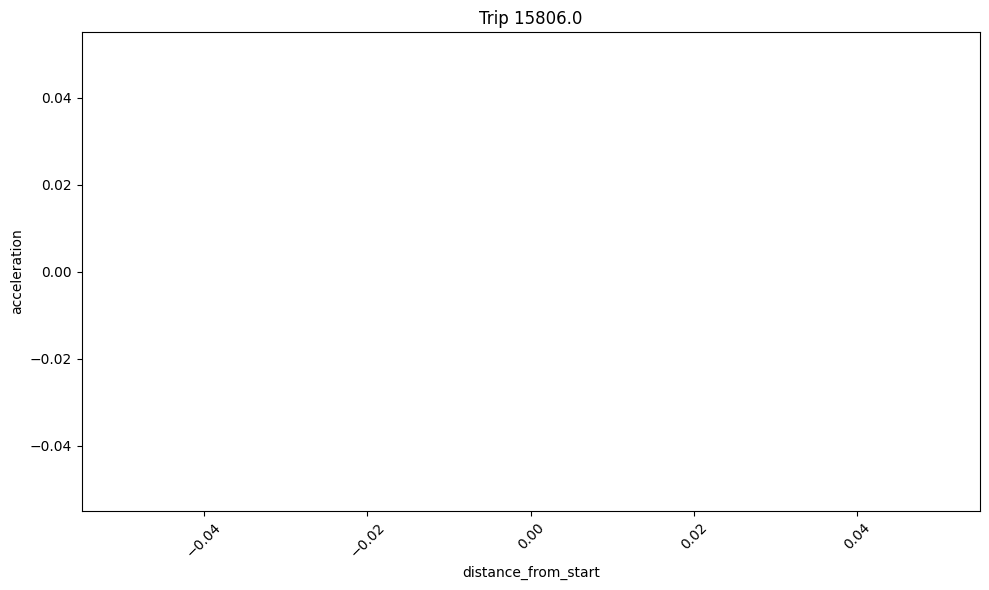

In [19]:
columnx='distance_from_start'
columny='acceleration'

trip_df = interpolated_dataframes[1]
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(trip_df[f"{columnx}"], trip_df[f"{columny}"])
plt.xlabel(f"{columnx}")
plt.ylabel(f"{columny}")
plt.title("Trip " + str(trip_id))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better formatting
plt.show()

In [20]:
# get the number of columns in dataframes_without_trip_id
num_columns = len(interpolated_dataframes[0].columns)
num_columns

6

In [21]:
# get a list of column names in interpolated_dataframes
column_namesInter = interpolated_dataframes[1].columns
#make it to a string list of names 
column_namesInter = column_namesInter.tolist()
column_namesInter

['radial_acceleration',
 'speed',
 'acceleration',
 'distance_from_start',
 'acceleration_der',
 'bus_stop']

# Clustering

In [22]:
Dict_of_clusters = {}

# Normal Cluster

In [23]:
features_only_df = data_to_cluster[['speed', 'acceleration', 'radial_acceleration','acceleration_der']]

# Norm cluser 2nd Attempt

In [24]:
data_to_cluster

trip_id  deviceid     speed  acceleration  radial_acceleration  \
23278     218.0       116  19.43850      0.003858                  0.0   
23279     220.0       116  17.81860      0.003163                  0.0   
23280     222.0       116  16.73870      0.003505                  0.0   
23281     224.0       116  22.13820      0.008307                  0.0   
39364     378.0       116  16.73870      0.005666                  0.0   
...         ...       ...       ...           ...                  ...   
529716  15569.0      1410   3.23974     -0.000547                  0.0   
529717  15571.0      1410   0.00000     -0.001301                  0.0   
529718  15578.0      1410   9.71923      0.001552                  0.0   
529719  15580.0      1410  16.73870      0.004277                  0.0   
529720  15806.0      1719   4.85961     -0.001007                  0.0   

        acceleration_der  
23278                0.0  
23279                0.0  
23280                0.0  
23281                0.0  
39364                0.0  
...                  ...  
529716               0.0  
529717               0.0  
529718               0.0  
529719               0.0  
529720               0.0  

[2535 rows x 6 columns]

In [25]:
# code to show all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [26]:
# Create a custom mapping dictionary
dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# Use the map function to label encode 'dayparts' column
fullDataset_with_Newfeatures['dayparts'] = fullDataset_with_Newfeatures['dayparts'].map(dayparts_mapping)

In [27]:
fullDataset_with_Newfeatures

trip_id  deviceid  direction  segment  run_time_in_seconds  length  \
0       4890.0     262.0        1.0      1.0                 69.0  0.6261   
1       4890.0     262.0        1.0      2.0                210.0  1.2808   
2       4890.0     262.0        1.0      3.0                496.0  2.1125   
3       4890.0     262.0        1.0      4.0                195.0  1.5513   
4       4890.0     262.0        1.0      5.0                 97.0  0.8450   
...        ...       ...        ...      ...                  ...     ...   
40742   3461.0     123.0        1.0     11.0                183.0  1.1000   
40743   3461.0     123.0        1.0     12.0                173.0  1.3100   
40744   3461.0     123.0        1.0     13.0                142.0  1.1500   
40745   3461.0     123.0        1.0     14.0                121.0  0.8900   
40746   3461.0     123.0        1.0     15.0                345.0  1.9700   

       day_of_week  time_of_day  Sunday/holiday  saturday  weekday/end  \
0              4.0         6.50             0.0         0            1   
1              4.0         6.50             0.0         0            1   
2              4.0         6.75             0.0         0            1   
3              4.0         6.75             0.0         0            1   
4              4.0         6.75             0.0         0            1   
...            ...          ...             ...       ...          ...   
40742          0.0        17.50             0.0         0            1   
40743          0.0        17.50             0.0         0            1   
40744          0.0        17.75             0.0         0            1   
40745          0.0        17.75             0.0         0            1   
40746          0.0        17.75             0.0         0            1   

       week_no  rt(w-1)  rt(w-2)  rt(w-3)  rt(t-1)  rt(t-2)  rt(n-1)  rt(n-2)  \
0          1.0     96.0     96.0     96.0     96.0     96.0     96.0     96.0   
1          1.0    247.0    247.0    247.0    247.0    247.0     69.0    247.0   
2          1.0    506.0    506.0    506.0    506.0    506.0    210.0     69.0   
3          1.0    192.0    192.0    192.0    192.0    192.0    496.0    210.0   
4          1.0    114.0    114.0    114.0    114.0    114.0    195.0    496.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
40742     42.0    172.0    166.0    156.0    242.0    116.0    194.0     39.0   
40743     42.0    183.0    170.0    172.0    142.0    150.0    183.0    194.0   
40744     42.0    149.0    149.0    161.0    149.0    134.0    173.0    183.0   
40745     42.0    119.0    119.0    151.0    335.0    119.0    142.0    173.0   
40746     42.0    366.0    366.0    364.0    382.0    366.0    121.0    142.0   

       rt(n-3)  hour_of_day  day  month  temp  precip  windspeed  dt(n-1)  \
0         96.0          6.0    1     10  20.0   0.000        6.1      0.0   
1        247.0          6.0    1     10  20.0   0.000        6.1     74.0   
2        506.0          6.0    1     10  20.0   0.000        6.1      0.0   
3         69.0          6.0    1     10  20.0   0.000        6.1      6.0   
4        210.0          6.0    1     10  20.0   0.000        6.1      0.0   
...        ...          ...  ...    ...   ...     ...        ...      ...   
40742     94.0         17.0   31     10  25.3   0.269        0.1      0.0   
40743     39.0         17.0   31     10  25.3   0.269        0.1     10.0   
40744    194.0         17.0   31     10  25.3   0.269        0.1      2.0   
40745    183.0         17.0   31     10  25.3   0.269        0.1     17.0   
40746    173.0         17.0   31     10  25.3   0.269        0.1     24.0   

       year  start_float  conditions_encoded  dayparts      speed  \
0      2021     6.663611                 4.0         0  14.938800   
1      2021     6.703333                 4.0         0   8.099356   
2      2021     6.761667                 4.0         0   7.752244   
3      2021     6.9

In [28]:
# get the number of Nan in each column
fullDataset_with_Newfeatures.isnull().sum()

trip_id                   0
deviceid                  0
direction                 0
segment                   0
run_time_in_seconds       0
length                    0
day_of_week               0
time_of_day               0
Sunday/holiday            0
saturday                  0
weekday/end               0
week_no                   0
rt(w-1)                   0
rt(w-2)                   0
rt(w-3)                   0
rt(t-1)                   0
rt(t-2)                   0
rt(n-1)                   0
rt(n-2)                   0
rt(n-3)                   0
hour_of_day               0
day                       0
month                     0
temp                      0
precip                    0
windspeed                 0
dt(n-1)                   0
year                      0
start_float               0
conditions_encoded        0
dayparts                  0
speed                  5891
acceleration           5891
radial_acceleration    5891
throttle_count         5891
break_count         

In [29]:
# get the number of unique trip ids
unique_trip_ids = fullDataset_with_Newfeatures['trip_id'].unique()
len(unique_trip_ids)

2736

In [30]:
# fill nan with 0
fullDataset_with_Newfeatures.fillna(0, inplace=True)

In [31]:
# print a list of all the columns in fullDataset_with_Newfeatures in a single line
print(list(fullDataset_with_Newfeatures.columns))

['trip_id', 'deviceid', 'direction', 'segment', 'run_time_in_seconds', 'length', 'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday', 'weekday/end', 'week_no', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'rt(t-1)', 'rt(t-2)', 'rt(n-1)', 'rt(n-2)', 'rt(n-3)', 'hour_of_day', 'day', 'month', 'temp', 'precip', 'windspeed', 'dt(n-1)', 'year', 'start_float', 'conditions_encoded', 'dayparts', 'speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count']


In [32]:
# group by trip_id and get the average value of each column exept take the mode of dayparts ( these are all the columns in the fullDataset_with_Newfeatures ['trip_id', 'deviceid', 'direction', 'segment', 'run_time_in_seconds', 'length', 'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday', 'weekday/end', 'week_no', 'rt(w-1)', 'rt(w-2)', 'rt(w-3)', 'rt(t-1)', 'rt(t-2)', 'rt(n-1)', 'rt(n-2)', 'rt(n-3)', 'hour_of_day', 'day', 'month', 'temp', 'precip', 'windspeed', 'dt(n-1)', 'year', 'start_float', 'conditions_encoded', 'dayparts', 'speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count'])
fullDataset_with_Newfeatures=fullDataset_with_Newfeatures.groupby(['trip_id','deviceid']).agg({'direction':'mean','segment':'mean','run_time_in_seconds':'mean','length':'mean','day_of_week':'mean','time_of_day':'mean','Sunday/holiday':'mean','saturday':'mean','weekday/end':'mean','week_no':'mean','rt(w-1)':'mean','rt(w-2)':'mean','rt(w-3)':'mean','rt(t-1)':'mean','rt(t-2)':'mean','rt(n-1)':'mean','rt(n-2)':'mean','rt(n-3)':'mean','hour_of_day':'mean','day':'mean','month':'mean','temp':'mean','precip':'mean','windspeed':'mean','dt(n-1)':'mean','year':'mean','start_float':'mean','conditions_encoded':'mean','dayparts': lambda x: x.mode(),'speed':'mean','acceleration':'mean','radial_acceleration':'mean','throttle_count':'mean','break_count':'mean'}).reset_index()

In [33]:
fullDataset_with_Newfeatures

trip_id  deviceid  direction  segment  run_time_in_seconds    length  \
0         2.0     116.0        1.0      8.0           177.933333  1.109007   
1         4.0     116.0        1.0      8.0           190.600000  1.109007   
2         6.0     116.0        1.0      8.0           184.066667  1.109007   
3         8.0     116.0        1.0      8.0           172.933333  1.109007   
4        10.0     116.0        1.0      8.0           183.933333  1.109007   
...       ...       ...        ...      ...                  ...       ...   
2731   5900.0     262.0        1.0      8.0           181.600000  1.108000   
2732   5901.0     262.0        1.0      8.0           162.200000  1.108000   
2733   5903.0     262.0        1.0      8.0           185.866667  1.108000   
2734   5905.0     262.0        1.0      8.0           206.066667  1.108000   
2735   5907.0     262.0        1.0      8.0           185.266667  1.108000   

      day_of_week  time_of_day  Sunday/holiday  saturday  weekday/end  \
0             5.0     8.350000             0.0       1.0          0.0   
1             5.0    12.683333             0.0       1.0          0.0   
2             5.0    16.900000             0.0       1.0          0.0   
3             6.0     8.833333             1.0       0.0          0.0   
4             6.0    15.183333             1.0       0.0          0.0   
...           ...          ...             ...       ...          ...   
2731          5.0    17.666667             0.0       1.0          0.0   
2732          0.0     6.600000             0.0       0.0          1.0   
2733          0.0    10.166667             0.0       0.0          1.0   
2734          0.0    13.666667             0.0       0.0          1.0   
2735          0.0    16.400000             0.0       0.0          1.0   

      week_no     rt(w-1)     rt(w-2)     rt(w-3)     rt(t-1)     rt(t-2)  \
0         3.0  169.200000  169.200000  169.200000  159.133333  169.200000   
1         3.0  194.133333  194.133333  194.133333  179.000000  194.133333   
2         3.0  177.200000  177.200000  177.200000  177.200000  156.866667   
3         3.0  173.266667  173.266667  173.266667  173.266667  173.266667   
4         3.0  174.200000  174.200000  174.200000  174.200000  174.200000   
...       ...         ...         ...         ...         ...         ...   
2731     41.0  177.666667  192.733333  179.400000  178.466667  176.466667   
2732     42.0  211.200000  211.200000  209.200000  211.200000  211.200000   
2733     42.0  188.800000  173.866667  172.066667  180.600000  187.733333   
2734     42.0  186.333333  189.000000  180.600000  172.200000  186.333333   
2735     42.0  171.066667  190.200000  172.933333  175.933333  175.733333   

         rt(n-1)     rt(n-2)     rt(n-3)  hour_of_day   day  month       temp  \
0     168.200000  177.266667  192.466667     8.000000  16.0   10.0  25.000000   
1     180.933333  195.000000  218.533333    12.266667  16.0   10.0  25.880000   
2     167.733333  176.733333  195.533333    16.600000  16.0   10.0  24.680000   
3     157.266667  166.600000  187.800000     8.533333  17.0   10.0  24.773333   
4     174.533333  183.333333  204.666667    14.800000  17.0   10.0  24.700000   
...          ...         ...         ...          ...   ...    ...        ...   
2731  169.533333  177.533333  196.866667    17.200000  29.0   10.0  27.380000   
2732  147.866667  158.266667  180.333333     6.000000  31.0   10.0  19.600000   
2733  173.400000  182.666667  202.333333     9.800000  31.0   10.0  24.440000   
2734  194.133333  203.400000  222.066667    13.266667  31.0   10.0  26.980000   
2735  167.400000  162.000000  181.666667    16.000000  31.0   10.0  25.100000   

      precip  windspeed    dt(n-1)    year  start_float  conditions_encoded  \
0     0.1940   2.100000  24.000000  2021.0     8.464056                 1.0   
1     0.0000  30.413333  37.600000  2021.0    12.824370                 4.0   
2     0.0654  12.100000  45.000000  2021.0    16.996889  

In [34]:
# drop columns in a given list
drop_list=['direction','segment','length']
# drop columns in drop_list
fullDataset_with_Newfeatures=fullDataset_with_Newfeatures.drop(drop_list, axis=1)

In [35]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# # Load your dataset here
# df = fullDataset_with_Newfeatures

# # Check the data types of all columns
# # print(df.dtypes)

# # Clean the DataFrame by removing non-numeric columns (replace 'str' with the actual data type)
# df = df.select_dtypes(include=['int', 'float'])

# # Check for missing values and handle them if necessary
# # print(df.isnull().sum())

# # Standardize the selected value columns (important for clustering)
# scaler = StandardScaler()
# df = scaler.fit_transform(df)

# # Define clustering algorithms
# algorithms = [
#     {
#         'name': 'K-Means',
#         'model': KMeans(n_clusters=4, random_state=0),
#     },
#     {
#         'name': 'Agglomerative',
#         'model': AgglomerativeClustering(n_clusters=4),
#     },
#     {
#         'name': 'DBSCAN',
#         'model': DBSCAN(eps=3.6, min_samples=4),
#     },
# ]

# # Iterate through clustering algorithms
# for algo in algorithms:
#     model = algo['model']
#     algo_name = algo['name']

#     # Fit the clustering model
#     cluster_labels = model.fit_predict(df)

#     # Create a new DataFrame to store the cluster labels along with your original data
#     result_df = fullDataset_with_Newfeatures.copy()
#     result_df['Cluster'] = cluster_labels

#     # Print the cluster labels
#     print(f"{algo_name} Cluster Labels:")
#     print(cluster_labels)

#     # Number of clusters formed (excluding outliers, labeled as -1)
#     n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
#     print(f"Number of clusters ({algo_name}): {n_clusters}")
    
#     # Print the number of trip ids in each cluster
#     print(result_df.groupby(['Cluster']).agg({'trip_id': 'count'}))

#     # Define custom colors for each cluster label
#     n_clusters = len(np.unique(cluster_labels))
#     colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
#     cmap = ListedColormap(colors)
    
#     val1='trip_id'
#     val2='speed'


#     # Adjust the dot size and add color mapping
#     dot_size = 1  # Adjust the size as needed
#     plt.scatter(result_df[val1], result_df[val2], c=cluster_labels, cmap=cmap, s=dot_size)
#     plt.xlabel(val1)
#     plt.ylabel(val2)
#     plt.title(f'{algo_name} Clustering')
#     plt.colorbar(label='Cluster')
#     plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Agglomerative Cluster Labels:
[1 1 1 ... 2 2 2]
Number of clusters (Agglomerative): 4
         trip_id
Cluster         
0           1731
1            579
2            208
3            218


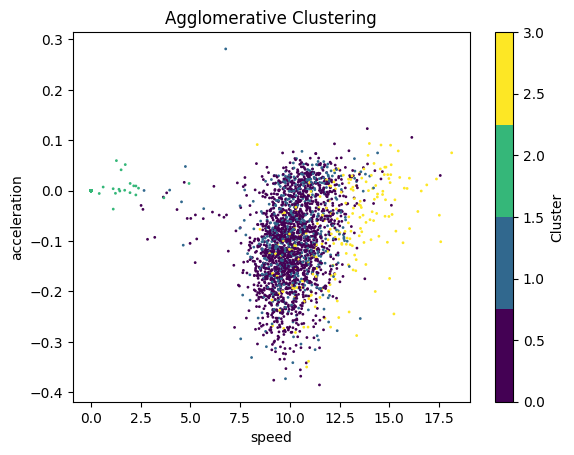

In [36]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load your dataset here
df = fullDataset_with_Newfeatures

# Check the data types of all columns
# print(df.dtypes)

# Clean the DataFrame by removing non-numeric columns (replace 'str' with the actual data type)
df = df.select_dtypes(include=['int', 'float'])

# Check for missing values and handle them if necessary
# print(df.isnull().sum())

# Standardize the selected value columns (important for clustering)
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Define Agglomerative clustering model with the best hyperparameters
n_clusters = 4  # Adjust the number of clusters as needed
linkage_method = 'ward'  # Choose the linkage method (e.g., 'ward', 'complete', 'average', 'single')
affinity_metric = 'euclidean'  # Choose the affinity metric (e.g., 'euclidean', 'manhattan', 'cosine')

model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, affinity=affinity_metric)

# Fit the clustering model
cluster_labels = model.fit_predict(df)

# Create a new DataFrame to store the cluster labels along with your original data
result_df = fullDataset_with_Newfeatures.copy()
result_df['Cluster'] = cluster_labels

# Print the cluster labels
print("Agglomerative Cluster Labels:")
print(cluster_labels)

# Number of clusters formed (excluding outliers, labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Number of clusters (Agglomerative): {n_clusters}")

# Print the number of trip ids in each cluster
print(result_df.groupby(['Cluster']).agg({'trip_id': 'count'}))

# Define custom colors for each cluster label
n_clusters = len(np.unique(cluster_labels))
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))
cmap = ListedColormap(colors)

val1 = 'speed'
val2 = 'acceleration'

# Adjust the dot size and add color mapping
dot_size = 1  # Adjust the size as needed
plt.scatter(result_df[val1], result_df[val2], c=cluster_labels, cmap=cmap, s=dot_size)
plt.xlabel(val1)
plt.ylabel(val2)
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
norm_cluster_2=result_df[['trip_id','Cluster']]
# rename the column 'Cluster' to 'Normcluster_new'
norm_cluster_2=norm_cluster_2.rename(columns={'Cluster':'Normcluster_new'})

In [38]:
norm_cluster_2

trip_id  Normcluster_new
0         2.0                1
1         4.0                1
2         6.0                1
3         8.0                1
4        10.0                1
...       ...              ...
2731   5900.0                2
2732   5901.0                2
2733   5903.0                2
2734   5905.0                2
2735   5907.0                2

[2736 rows x 2 columns]

In [39]:
Dict_of_clusters['norm_cluster_New']=norm_cluster_2

In [40]:
fullDataset_with_Newfeatures

trip_id  deviceid  run_time_in_seconds  day_of_week  time_of_day  \
0         2.0     116.0           177.933333          5.0     8.350000   
1         4.0     116.0           190.600000          5.0    12.683333   
2         6.0     116.0           184.066667          5.0    16.900000   
3         8.0     116.0           172.933333          6.0     8.833333   
4        10.0     116.0           183.933333          6.0    15.183333   
...       ...       ...                  ...          ...          ...   
2731   5900.0     262.0           181.600000          5.0    17.666667   
2732   5901.0     262.0           162.200000          0.0     6.600000   
2733   5903.0     262.0           185.866667          0.0    10.166667   
2734   5905.0     262.0           206.066667          0.0    13.666667   
2735   5907.0     262.0           185.266667          0.0    16.400000   

      Sunday/holiday  saturday  weekday/end  week_no     rt(w-1)     rt(w-2)  \
0                0.0       1.0          0.0      3.0  169.200000  169.200000   
1                0.0       1.0          0.0      3.0  194.133333  194.133333   
2                0.0       1.0          0.0      3.0  177.200000  177.200000   
3                1.0       0.0          0.0      3.0  173.266667  173.266667   
4                1.0       0.0          0.0      3.0  174.200000  174.200000   
...              ...       ...          ...      ...         ...         ...   
2731             0.0       1.0          0.0     41.0  177.666667  192.733333   
2732             0.0       0.0          1.0     42.0  211.200000  211.200000   
2733             0.0       0.0          1.0     42.0  188.800000  173.866667   
2734             0.0       0.0          1.0     42.0  186.333333  189.000000   
2735             0.0       0.0          1.0     42.0  171.066667  190.200000   

         rt(w-3)     rt(t-1)     rt(t-2)     rt(n-1)     rt(n-2)     rt(n-3)  \
0     169.200000  159.133333  169.200000  168.200000  177.266667  192.466667   
1     194.133333  179.000000  194.133333  180.933333  195.000000  218.533333   
2     177.200000  177.200000  156.866667  167.733333  176.733333  195.533333   
3     173.266667  173.266667  173.266667  157.266667  166.600000  187.800000   
4     174.200000  174.200000  174.200000  174.533333  183.333333  204.666667   
...          ...         ...         ...         ...         ...         ...   
2731  179.400000  178.466667  176.466667  169.533333  177.533333  196.866667   
2732  209.200000  211.200000  211.200000  147.866667  158.266667  180.333333   
2733  172.066667  180.600000  187.733333  173.400000  182.666667  202.333333   
2734  180.600000  172.200000  186.333333  194.133333  203.400000  222.066667   
2735  172.933333  175.933333  175.733333  167.400000  162.000000  181.666667   

      hour_of_day   day  month       temp  precip  windspeed    dt(n-1)  \
0        8.000000  16.0   10.0  25.000000  0.1940   2.100000  24.000000   
1       12.266667  16.0   10.0  25.880000  0.0000  30.413333  37.600000   
2       16.600000  16.0   10.0  24.680000  0.0654  12.100000  45.000000   
3        8.533333  17.0   10.0  24.773333  0.0000  20.840000  31.733333   
4       14.800000  17.0   10.0  24.700000  0.0000  24.920000  21.933333   
...           ...   ...    ...        ...     ...        ...        ...   
2731    17.200000  29.0   10.0  27.380000  0.0432   1.380000  13.333333   
2732     6.000000  31.0   10.0  19.600000  0.0000   3.600000  12.066667   
2733     9.800000  31.0   10.0  24.440000  0.0000   5.480000  24.600000   
2734    13.266667  31.0   10.0  26.980000  0.0000   3.960000  11.666667   
2735    16.000000  31.0   10.0  25.100000  0.0000   5.400000  11.866667   

        year  start_float  conditions_encoded  dayparts      speed  \
0     2021.0     8.464056                 1.0         1  10.984888   
1     2021.0    12.824370                 4.0         1   9.518909   
2     2021.0    16.996889                 1.8         1  10.071510   
3     2021.0  

# Visualize Cluster Data

In [55]:
# data_to_cluster is equal to a copy of fullDataset_with_Newfeatures just with the columns 'trip_id','deviceid','speed','acceleration','radial_acceleration','acceleration_der'
data_to_cluster=fullDataset_with_Newfeatures[['trip_id','deviceid','speed','acceleration','radial_acceleration','throttle_count','break_count']]

In [57]:
# group data_to_cluster by trip_id , get the average value of each column
cluster_data=data_to_cluster.groupby(['trip_id','deviceid']).agg({'speed':'mean','acceleration':'mean','radial_acceleration':'mean','throttle_count':'mean','break_count' : 'mean'}).reset_index()

In [58]:
cluster_data

trip_id  deviceid      speed  acceleration  radial_acceleration  \
0         2.0     116.0  10.984888      0.003459             0.523093   
1         4.0     116.0   9.518909      0.008380             0.450517   
2         6.0     116.0  10.071510     -0.021370             0.451787   
3         8.0     116.0  11.071454      0.036931             0.581775   
4        10.0     116.0  10.586416      0.014482             0.495884   
...       ...       ...        ...           ...                  ...   
2731   5900.0     262.0   0.000000      0.000000             0.000000   
2732   5901.0     262.0   0.000000      0.000000             0.000000   
2733   5903.0     262.0   0.000000      0.000000             0.000000   
2734   5905.0     262.0   0.000000      0.000000             0.000000   
2735   5907.0     262.0   0.000000      0.000000             0.000000   

      throttle_count  break_count  
0           1.800000     1.733333  
1           2.333333     1.866667  
2           2.466667     2.000000  
3           1.866667     1.733333  
4           2.533333     2.200000  
...              ...          ...  
2731        0.000000     0.000000  
2732        0.000000     0.000000  
2733        0.000000     0.000000  
2734        0.000000     0.000000  
2735        0.000000     0.000000  

[2736 rows x 7 columns]

In [59]:
# left join cluster_data with Norm_clusters_data and ts_kmeans_clusters on trip_id  
for key in Dict_of_clusters:
    cluster_data=cluster_data.merge(Dict_of_clusters[key], on='trip_id', how='left')




In [60]:
cluster_data

trip_id  deviceid      speed  acceleration  radial_acceleration  \
0         2.0     116.0  10.984888      0.003459             0.523093   
1         4.0     116.0   9.518909      0.008380             0.450517   
2         6.0     116.0  10.071510     -0.021370             0.451787   
3         8.0     116.0  11.071454      0.036931             0.581775   
4        10.0     116.0  10.586416      0.014482             0.495884   
...       ...       ...        ...           ...                  ...   
2731   5900.0     262.0   0.000000      0.000000             0.000000   
2732   5901.0     262.0   0.000000      0.000000             0.000000   
2733   5903.0     262.0   0.000000      0.000000             0.000000   
2734   5905.0     262.0   0.000000      0.000000             0.000000   
2735   5907.0     262.0   0.000000      0.000000             0.000000   

      throttle_count  break_count  Normcluster_new  
0           1.800000     1.733333                1  
1           2.333333     1.866667                1  
2           2.466667     2.000000                1  
3           1.866667     1.733333                1  
4           2.533333     2.200000                1  
...              ...          ...              ...  
2731        0.000000     0.000000                2  
2732        0.000000     0.000000                2  
2733        0.000000     0.000000                2  
2734        0.000000     0.000000                2  
2735        0.000000     0.000000                2  

[2736 rows x 8 columns]

In [61]:
# print the unique values in Normcluster_new
cluster_data['Normcluster_new'].unique()

array([1, 3, 0, 2], dtype=int64)

# Calc Clusters for Bys id And Save

In [64]:
all_clusters=cluster_data.drop(['speed','acceleration','radial_acceleration','throttle_count','break_count'], axis=1)
all_clusters

trip_id  deviceid  Normcluster_new
0         2.0     116.0                1
1         4.0     116.0                1
2         6.0     116.0                1
3         8.0     116.0                1
4        10.0     116.0                1
...       ...       ...              ...
2731   5900.0     262.0                2
2732   5901.0     262.0                2
2733   5903.0     262.0                2
2734   5905.0     262.0                2
2735   5907.0     262.0                2

[2736 rows x 3 columns]

In [65]:
import pandas as pd

# Assuming you have a DataFrame named 'all_clusters'
# First, use pd.to_numeric to convert the column to numeric, coercing errors to NaN
all_clusters['Normcluster_new'] = pd.to_numeric(all_clusters['Normcluster_new'], errors='coerce')

# Next, fill NaN values with a default integer value (e.g., 0)
all_clusters['Normcluster_new'].fillna(0, inplace=True)

# Finally, convert the column to integers
all_clusters['Normcluster_new'] = all_clusters['Normcluster_new'].astype(int)

# Now, you have the 'norm_cluster_New' column as integers

print(all_clusters['Normcluster_new'].unique())

[1 3 0 2]


In [66]:
# get columnname of cluster columns
cluster_columns=all_clusters.columns[2:].tolist()
cluster_columns

['Normcluster_new']

In [67]:
all_clus_grp=all_clusters.groupby('deviceid')


In [68]:
import pandas as pd

dicts_cluster_percentages = {}

for cluster in cluster_columns:
    # Create an empty list to store dictionaries of data for each device ID
    result_data = []

    # Loop through each dataframe in the all_clus_grp
    for deviceid, df in all_clus_grp:
        # Count the occurrences of each cluster type for the current device ID
        cluster_counts = df[cluster].value_counts(normalize=True).reset_index()
        cluster_counts.columns = ['Cluster', 'Percentage']

        # Create a dictionary to store the data for the current device ID
        device_data = {
            'deviceid': deviceid
        }

        # Add the cluster percentage data to the dictionary
        for index, row in cluster_counts.iterrows():
            device_data[f'Cluster_{row["Cluster"]}'] = round(row['Percentage'] * 100)

        # Append the device_data dictionary to the result_data list
        result_data.append(device_data)

    # Create a DataFrame from the list of dictionaries
    result_df = pd.DataFrame(result_data)

    # Fill NaN values with 0
    result_df = result_df.fillna(0)

    # Reorder the columns as needed (deviceid first, then Cluster percentages)
    result_df = result_df[['deviceid'] + [col for col in result_df.columns if col.startswith('Cluster_')]]

    # Display the result_df
    print(f"Cluster: {cluster}")
    print(result_df)
    
    # save the result_df to csv files
    result_df.to_csv(f'../DataOut/Clusters/{cluster}_cluster_percentages.csv', index=False)


Cluster: Normcluster_new
   deviceid  Cluster_0.0  Cluster_1.0  Cluster_3.0  Cluster_2.0
0     116.0           63           25          9.0            3
1     117.0           80           17          0.0            3
2     121.0           66           25          7.0            3
3     123.0           61           24         13.0            3
4     128.0           61           23         13.0            3
5     209.0           50           25          0.0           25
6     250.0           70           19          8.0            3
7     262.0           52           15          4.0           30
